In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Loading the data

In [2]:
np.random.seed(42)
data = pd.read_csv('XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')
data.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


Data Exploration

In [3]:
# Counts of each type of data
data['Year'].value_counts()

Year
Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: count, dtype: int64

In [4]:
data['Major'].value_counts()

Major
Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: count, dtype: int64

In [5]:
data['University'].value_counts()

University
Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapolis (IUPUI)     682
University of Notre Dame                                      144
University of Evansville                                      143
Indiana University Bloomington                                 12
Valparaiso University                                           9
Purdue University                                               1
DePauw University                                               1
Name: count, dtype: int64

In [6]:
data['Time'].value_counts()

Time
13    1316
12    1314
14     883
11     857
15     282
10     247
16      49
9       40
8        8
17       4
Name: count, dtype: int64

In [7]:
data['Order'].value_counts()

Order
Sugar Cream Pie                                             512
Indiana Pork Chili                                          510
Cornbread Hush Puppies                                      510
Sweet Potato Fries                                          508
Ultimate Grilled Cheese Sandwich (with bacon and tomato)    503
Indiana Buffalo Chicken Tacos (3 tacos)                     496
Indiana Corn on the Cob (brushed with garlic butter)        495
Breaded Pork Tenderloin Sandwich                            494
Fried Catfish Basket                                        490
Hoosier BBQ Pulled Pork Sandwich                            482
Name: count, dtype: int64

The data is mostly balanced in most of the columns. The data in the year column though is very skewed towards those in the middle of their education, so this data may not be representative of all college students using ths app. This data may also be useful for the business to know what demographics, schools, and majors to market the app towards.

Seeing that this data is from college students as well, this may be biased towards a class of people that is not as representative of a general population. This may cause our model to potentially not be as accurate towards a general population. However, it might help the business as it can help college students make a decision easier as to what they will purchase with the app. It is also worth noting that we are storing some potentially sensitive information of our users, so it is important that this data is only given access to those who need it.

In [8]:
# Checking for null values
data.isnull().sum()

Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64

Data preprocessing

In [9]:
# Shuffling the data
data = data.sample(frac=1).reset_index(drop=True)

# Encoding the categorical data
le = LabelEncoder()
data['Year'] = le.fit_transform(data['Year'])
data['Major'] = le.fit_transform(data['Major'])
data['University'] = le.fit_transform(data['University'])
data['Time'] = le.fit_transform(data['Time'])

# One hot encoding the order column
ohe = OneHotEncoder()
order = ohe.fit_transform(data['Order'].values.reshape(-1,1)).toarray()
data.head()

,Year,Major,University,Time,Order
0,1,12,0,6,Ultimate Grilled Cheese Sandwich (with bacon a...
1,2,11,1,2,Breaded Pork Tenderloin Sandwich
2,1,3,3,8,Sweet Potato Fries
3,1,17,3,3,Fried Catfish Basket
4,2,8,3,5,Indiana Buffalo Chicken Tacos (3 tacos)


Splitting the data

In [10]:
X = data.drop(['Order'], axis=1)
X = X.values
# Normalizing the data
X = (X - X.mean()) / X.std()
y = order

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

K-Fold Cross Validation

In [11]:
model = MLPClassifier(hidden_layer_sizes=(500, 250, 100), max_iter=1000, activation='relu', solver='adam', random_state=42)
kfold = KFold(n_splits=5)
results = cross_val_score(model, X_train, y_train, cv=kfold)

print("Accuracy: ", str(results.mean()*100))

Accuracy:  52.25


Training the model

In [12]:
model = MLPClassifier(hidden_layer_sizes=(500, 250, 100), max_iter=1000, activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)
print("Training accuracy: ", accuracy_score(y_train, model.predict(X_train)) * 100)

Training accuracy:  58.025000000000006


Loss curve

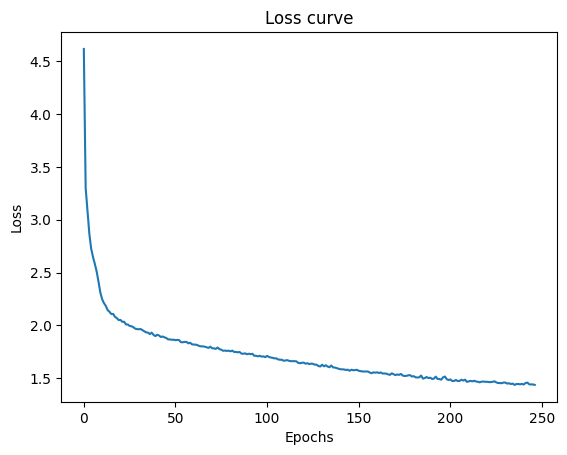

In [13]:
plt.plot(model.loss_curve_)
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

To see if using this model to predict a food item would be useful, it would be best to test it with users to see if it would be accurate to what they would like at the moment. It would also be useful to potentially add more features to the data to try and increase the accuracy of the model seeing that the accuracy is only at 58% at the current moment. It might also be more useful to use data specific to each user to predict what they would like based on their individual trends as well

Save the model

In [14]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))